## Home Task

Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Use elbow method to determine the best k for Kmeans


In [ ]:
from sklearn.datasets import make_blobs
import numpy as np 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt0
import numpy as np
import matplotlib.pyplot as plt 
# %matplotlib notebook

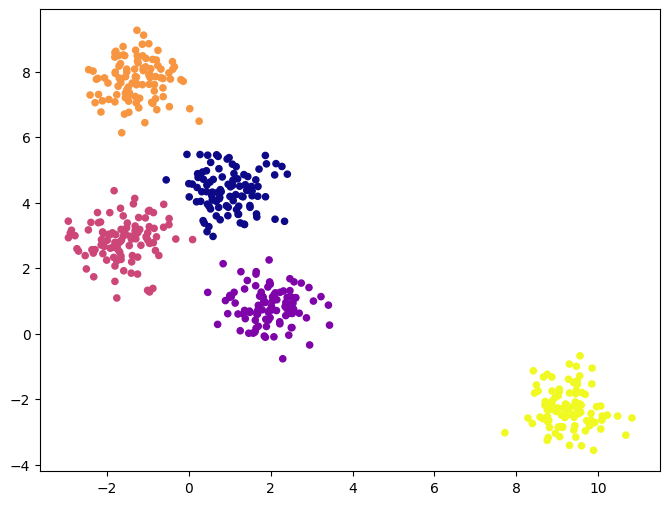

In [ ]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.plasma(val)
          for val in np.linspace(0, 1, len(set(y)))])

plt.figure(figsize=(8,6))
plt.scatter(x= X[:,0], y=X[:,1], c= colors[y], s= 20)    

### **Agglomerative clustering:**
 
#### Complete Linkage
- **Definition:** Distance between clusters is defined as the **maximum** distance between any two points in the two clusters.
- **Effect:** Tends to form **compact and spherical** clusters.
- **More sensitive** to outliers.

#### Single Linkage
- **Definition:** Distance between clusters is the **minimum** distance between any two points in the two clusters.
- **Effect:** Can result in **long, chain-like** clusters (also known as chaining effect).
- **Can handle** non-elliptical shapes better, but may be affected by noise.

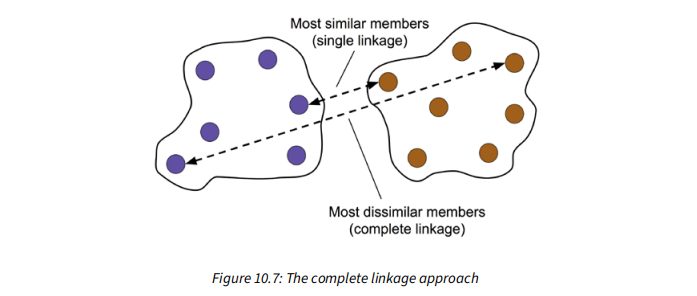

*Image source: Figure 10.7 from "Machine Learning with PyTorch and Scikit-Learn" by Tushar Gupta, Packt Publishing, 2022.*


### Agglomerative clustering (`Complete Linkage`)

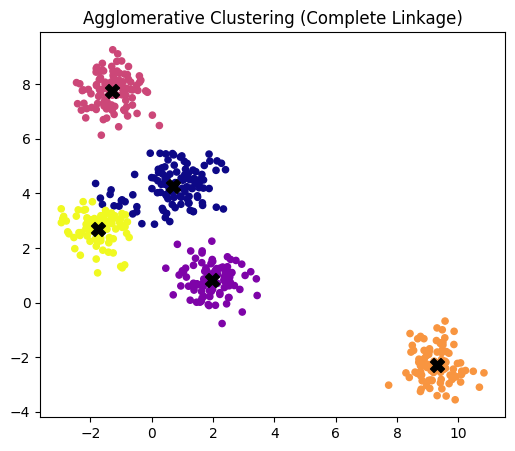

In [48]:
# Apply AgglomerativeClustering with Complete Linkage
agg_complete = AgglomerativeClustering(linkage='complete', n_clusters=5)
labels_complete = agg_complete.fit_predict(X)

# Calculate centroids as the average for each cluster
unique_labels = np.unique(labels_complete)
centroids = np.array([X[labels_complete == label].mean(axis=0) for label in unique_labels])

# Visualization
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_complete, cmap='plasma', s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X', label='Centroids')
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()

### Agglomerative clustering: (`Single Linkage`)

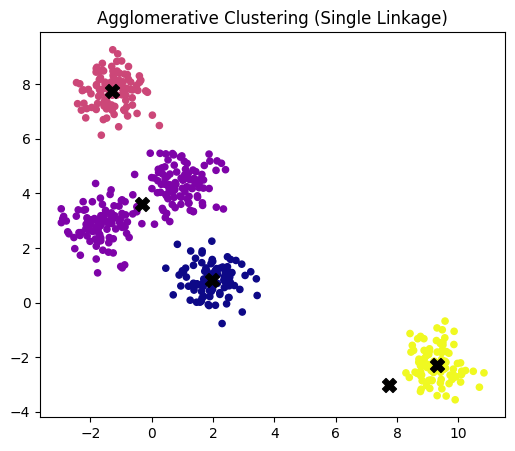

In [ ]:
# Apply AgglomerativeClustering with Single Linkage
agg_single = AgglomerativeClustering(linkage='single', n_clusters=5)
labels_single = agg_single.fit_predict(X)

# Calculate centroids as the average for each cluster
unique_labels = np.unique(labels_single)
centroids = np.array([X[labels_single == label].mean(axis=0) for label in unique_labels])

# Visualization
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_single, cmap='plasma', s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X', label='Centroids')
plt.title("Agglomerative Clustering (Single Linkage)")
plt.show()

### Observation

In the **Single Link** agglomerative clustering method, each point is initially considered as a separate cluster. However, this method can sometimes classify a single point as a cluster on its own, which happened in our case

### **DBSCAN**

 Advantages:
- Can find arbitrarily shaped clusters
- Handles noise and outliers naturally
- Works well when clusters vary in size and density
- No need to specify number of clusters in advance

Limitations:
- Performance depends on the choice of `eps` and `min_samples`.
- Not good for high-dimensional data.

 Key Parameters:
- `eps` (epsilon): Radius of a core point
- `min_samples`: Minimum number of points required to form a dense region 


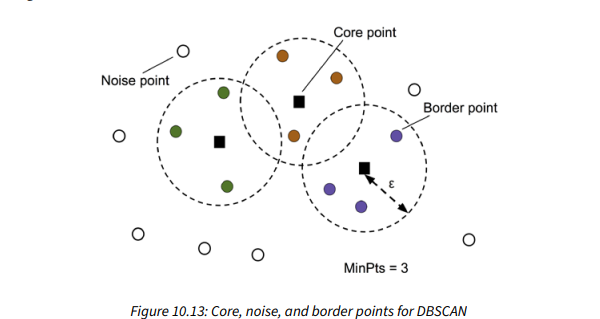

*Image source: Figure 10.13 from "Machine Learning with PyTorch and Scikit-Learn" by Tushar Gupta, Packt Publishing, 2022.*

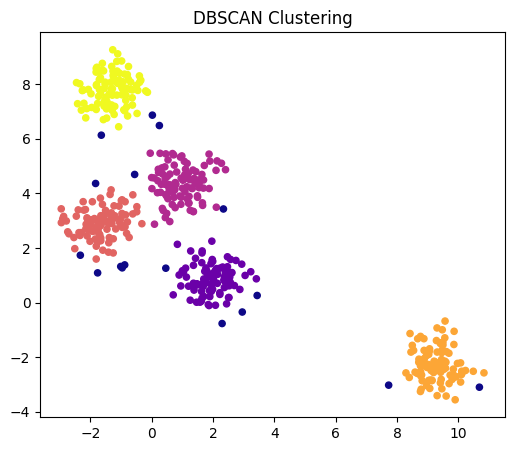

In [ ]:
# Apply DBSCAN 
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Visualization
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='plasma', s=20)
plt.title("DBSCAN Clustering")
plt.show()

### **Elbow Method for KMeans**

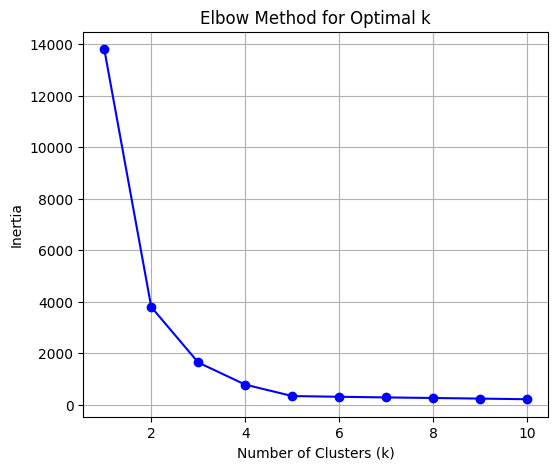

In [ ]:
# Initialize a list to store the inertia values for different k
inertia = []
k_range = range(1, 11)

# Loop through different values of k and compute the inertia for each
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualization
plt.figure(figsize=(6, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

### **KMeans with best k** (k=5 based on elbow plot)

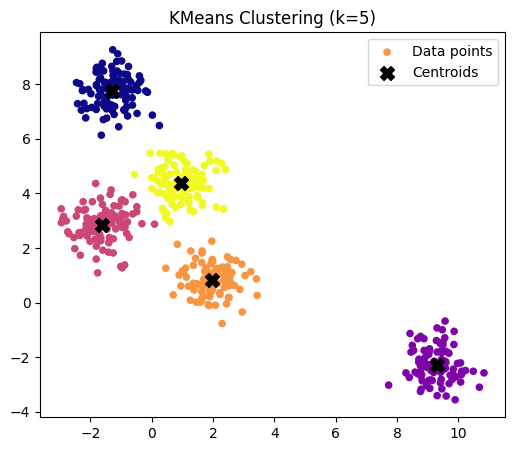

In [47]:
kmeans_final = KMeans(n_clusters=5, random_state=0)
labels_kmeans = kmeans_final.fit_predict(X)

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='plasma', s=20, label='Data points')
plt.scatter(kmeans_final.cluster_centers_[:, 0], 
            kmeans_final.cluster_centers_[:, 1], 
            c='black', 
            s=100, 
            marker='X', 
            label='Centroids')
plt.title("KMeans Clustering (k=5)")
plt.legend()
plt.show()